# **1. Importing Libraries and Data**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
data = pd.read_csv('/content/Sample - Superstore.csv', encoding='latin1')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


#  **2. Data exploration**

In [5]:
print("Shape:", data.shape)

Shape: (9994, 21)


In [4]:
print(data.dtypes)

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object


In [5]:
print(data.isnull().sum)

<bound method DataFrame.sum of       Row ID  Order ID  Order Date  Ship Date  Ship Mode  Customer ID  \
0      False     False       False      False      False        False   
1      False     False       False      False      False        False   
2      False     False       False      False      False        False   
3      False     False       False      False      False        False   
4      False     False       False      False      False        False   
...      ...       ...         ...        ...        ...          ...   
9989   False     False       False      False      False        False   
9990   False     False       False      False      False        False   
9991   False     False       False      False      False        False   
9992   False     False       False      False      False        False   
9993   False     False       False      False      False        False   

      Customer Name  Segment  Country   City  ...  Postal Code  Region  \
0             Fals

In [6]:
data.describe().round(2)

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.00,9994.00,9994.00,9994.00,9994.00,9994.00
mean,4997.50,55190.38,229.86,3.79,0.16,28.66
std,2885.16,32063.69,623.25,2.23,0.21,234.26
min,1.00,1040.00,0.44,1.00,0.00,-6599.98
25%,2499.25,23223.00,17.28,2.00,0.00,1.73
50%,4997.50,56430.50,54.49,3.00,0.20,8.67
75%,7495.75,90008.00,209.94,5.00,0.20,29.36
max,9994.00,99301.00,22638.48,14.00,0.80,8399.98


# **3. Data Cleaning**

In [7]:
data= data.dropna()

In [8]:
data= data.drop_duplicates()

Convert dates to datetime type and extract the year

In [9]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date']  = pd.to_datetime(data['Ship Date'])
data['Order Year'] = data['Order Date'].dt.year


# **4. Descriptive analysis of data**

In [10]:
print(data.dtypes)

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
Order Year                int32
dtype: object


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

# **5. Deep Data Analysis**

# **📊 Sales Number Analysis**

In [12]:
data['Segment'].value_counts()

,count
Segment,
Consumer,5191
Corporate,3020
Home Office,1783


In [13]:
data['Country'].value_counts()

,count
Country,
United States,9994


In [14]:
data['City'].value_counts()

,count
City,
New York City,915
Los Angeles,747
Philadelphia,537
San Francisco,510
Seattle,428
...,...
Abilene,1
Montebello,1
Kissimmee,1


In [15]:
data['State'].value_counts()

,count
State,
California,2001
New York,1128
Texas,985
Pennsylvania,587
Washington,506
Illinois,492
Ohio,469
Florida,383
Michigan,255


In [16]:
data['Region'].value_counts()

,count
Region,
West,3203
East,2848
Central,2323
South,1620


In [17]:
data['Category'].value_counts()

,count
Category,
Office Supplies,6026
Furniture,2121
Technology,1847


In [18]:
data['Sub-Category'].value_counts()

,count
Sub-Category,
Binders,1523
Paper,1370
Furnishings,957
Phones,889
Storage,846
Art,796
Accessories,775
Chairs,617
Appliances,466


## **🔹Number of sales by category**

 #### **How many sales did you make in each category?**

          Category  Count
0  Office Supplies   6026
1        Furniture   2121
2       Technology   1847


<ipython-input-19-36514915fa0e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_counts, x='Category', y='Count', palette='viridis')


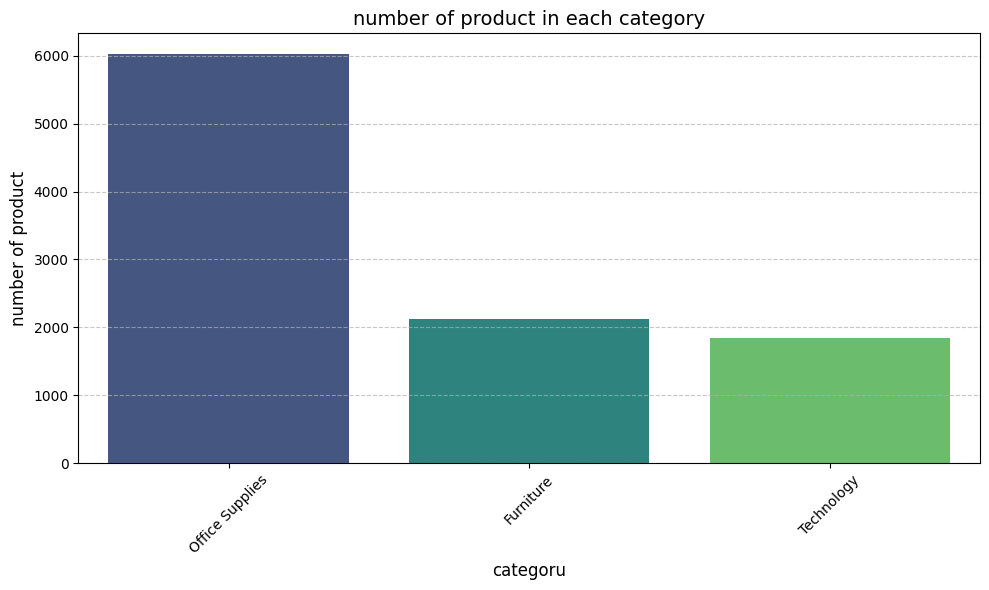

In [19]:
# عدد المنتجات في كل تصنيف
category_counts = data['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']
print(category_counts)
plt.figure(figsize=(10, 6))
sns.barplot(data=category_counts, x='Category', y='Count', palette='viridis')
plt.title('number of product in each category', fontsize=14)
plt.xlabel('categoru', fontsize=12)
plt.ylabel('number of product', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

📌Insight:The "Office Supplies" category has a higher number of sales
The "Technology" category has a lower number of sales

## **🔹Number of sales by subcategories**

#### **How many sales were made in each subcategory?**

   Sub-Category  Count
0       Binders   1523
1         Paper   1370
2   Furnishings    957
3        Phones    889
4       Storage    846
5           Art    796
6   Accessories    775
7        Chairs    617
8    Appliances    466
9        Labels    364
10       Tables    319
11    Envelopes    254
12    Bookcases    228
13    Fasteners    217
14     Supplies    190
15     Machines    115
16      Copiers     68


<ipython-input-20-9570074b7eed>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sub_category_counts, x='Sub-Category', y='Count', palette='viridis')


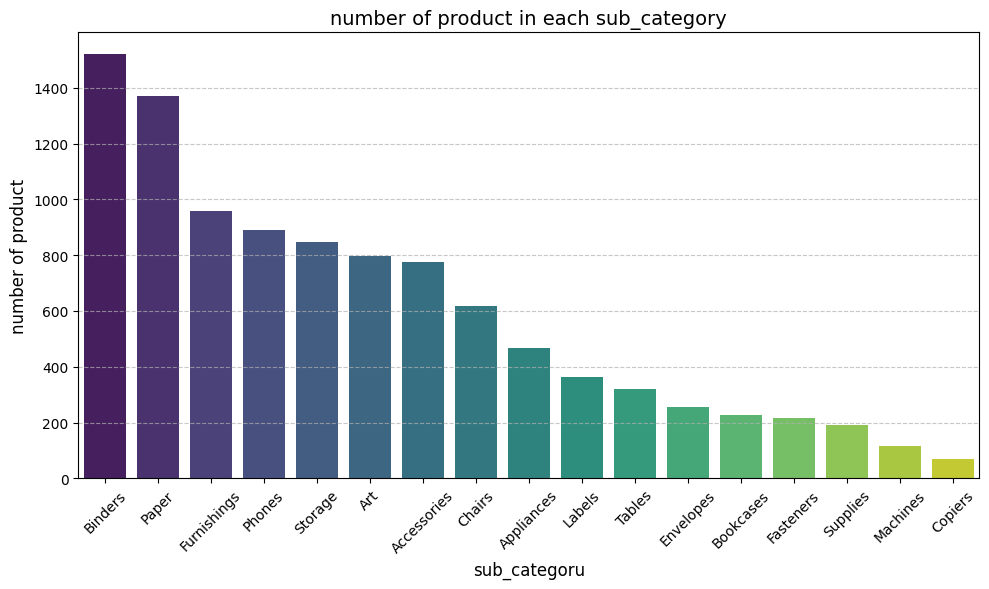

In [20]:

sub_category_counts = data['Sub-Category'].value_counts().reset_index()
sub_category_counts.columns = ['Sub-Category', 'Count']
print(sub_category_counts)
plt.figure(figsize=(10, 6))
sns.barplot(data=sub_category_counts, x='Sub-Category', y='Count', palette='viridis')
plt.title('number of product in each sub_category', fontsize=14)
plt.xlabel('sub_categoru', fontsize=12)
plt.ylabel('number of product', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

📌Insight:

## **🔹Number of sales in each country**

What is the number of product sales in each Country?

In [21]:
# عدد الطلبات في كل دولة
Country_counts = data['Country'].value_counts().reset_index()
Country_counts.columns = ['Country', 'Count']
print(Country_counts)



         Country  Count
0  United States   9994


📌 Insight: There is one country, the United States of America, and the number of sales in it is 9,994

## **🔹 Number of sales in each region**

What is the number of product sales in each region?

    Region  Count
0     West   3203
1     East   2848
2  Central   2323
3    South   1620


<ipython-input-22-ccdc5de02bf1>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_counts, x='Region', y='Count', palette='viridis')


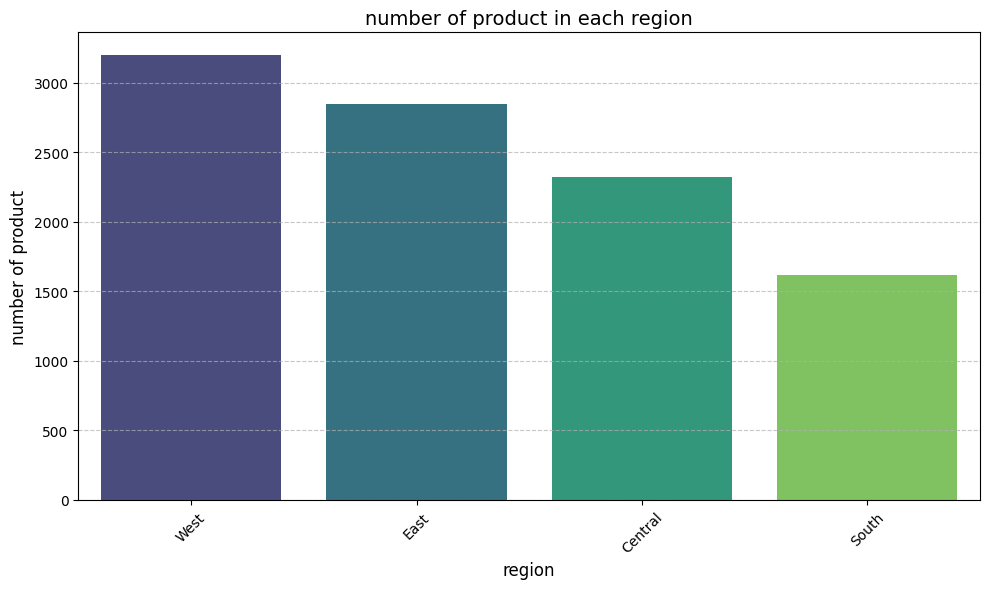

In [22]:
# عدد الطلبات في كل منطقة
region_counts = data['Region'].value_counts().reset_index()
region_counts.columns = ['Region', 'Count']
print(region_counts)

plt.figure(figsize=(10, 6))
sns.barplot(data=region_counts, x='Region', y='Count', palette='viridis')
plt.title('number of product in each region', fontsize=14)
plt.xlabel('region', fontsize=12)
plt.ylabel('number of product', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

📌 Insight: The number of sales in the West region is the highest, with a value of 3,203 sales, and the South region has the lowest sales, with a value of 1,620 sales.

## **🔹 Number of sales in each state**

What is the number of product sales in each state?

                   State  Count
0             California   2001
1               New York   1128
2                  Texas    985
3           Pennsylvania    587
4             Washington    506
5               Illinois    492
6                   Ohio    469
7                Florida    383
8               Michigan    255
9         North Carolina    249
10               Arizona    224
11              Virginia    224
12               Georgia    184
13             Tennessee    183
14              Colorado    182
15               Indiana    149
16              Kentucky    139
17         Massachusetts    135
18            New Jersey    130
19                Oregon    124
20             Wisconsin    110
21              Maryland    105
22              Delaware     96
23             Minnesota     89
24           Connecticut     82
25              Missouri     66
26              Oklahoma     66
27               Alabama     61
28              Arkansas     60
29          Rhode Island     56
30      

<ipython-input-23-262614a9e30d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=State_counts, x='State', y='Count', palette='viridis')


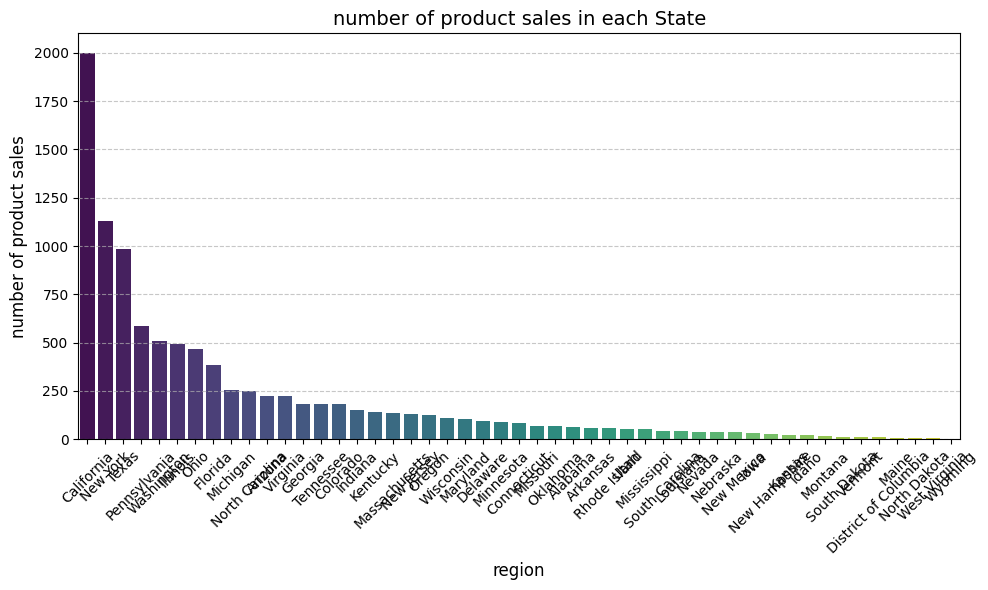

          State  Count
0    California   2001
1      New York   1128
2         Texas    985
3  Pennsylvania    587
4    Washington    506


In [23]:
State_counts = data['State'].value_counts().reset_index()
State_counts.columns = ['State', 'Count']
print(State_counts)

plt.figure(figsize=(10, 6))
sns.barplot(data=State_counts, x='State', y='Count', palette='viridis')
plt.title('number of product sales in each State', fontsize=14)
plt.xlabel('region', fontsize=12)
plt.ylabel('number of product sales', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print(State_counts.head(5))

📌 Insight: There are 48 states. The state with the highest number of product sales was California, with 2,001 sales, followed by New York with 1,128 sales.

In [24]:
City_counts = data['City'].value_counts().reset_index()
City_counts.columns = ['City', 'Count']
print(City_counts)


print(' The top city with highest number of sales', City_counts.head(10))

              City  Count
0    New York City    915
1      Los Angeles    747
2     Philadelphia    537
3    San Francisco    510
4          Seattle    428
..             ...    ...
526        Abilene      1
527     Montebello      1
528      Kissimmee      1
529        Danbury      1
530     Springdale      1

[531 rows x 2 columns]
 The top city with highest number of sales             City  Count
0  New York City    915
1    Los Angeles    747
2   Philadelphia    537
3  San Francisco    510
4        Seattle    428
5        Houston    377
6        Chicago    314
7       Columbus    222
8      San Diego    170
9    Springfield    163


📌 Insight: There are 530 cities. The city with the highest sales of products are New York, which has sales of 915 products, followed by Los Angeles with sales of 747 products.



**********************************************************

# **📊 Correlation**

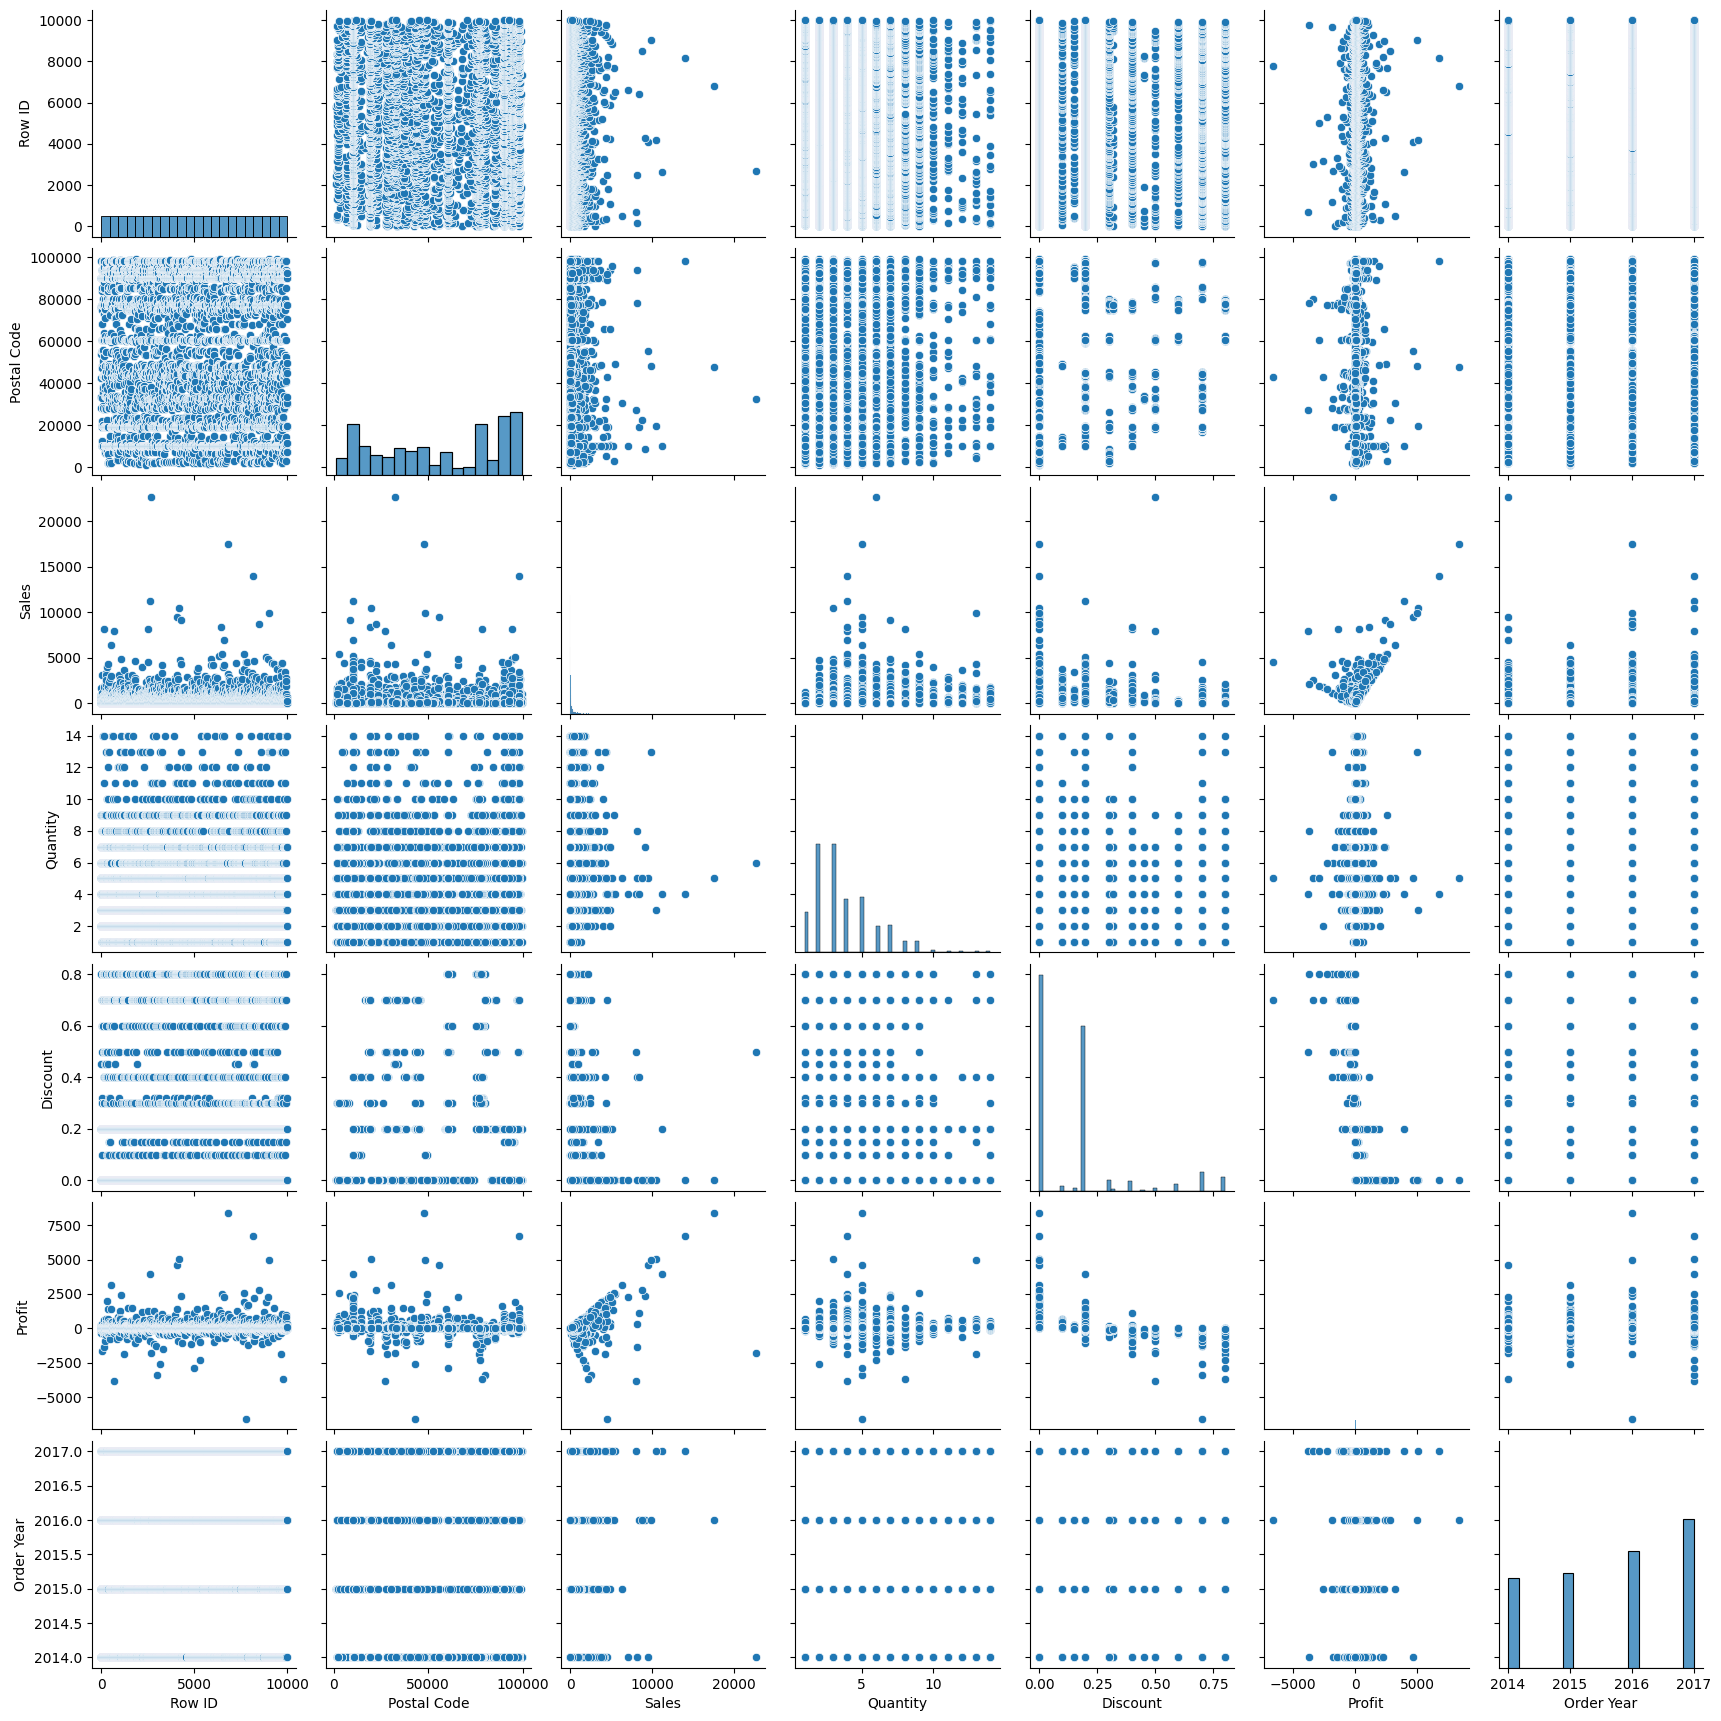

In [25]:
sns.pairplot(data)

# **🔹 correlation between profit, sales, quantity, and discounts**

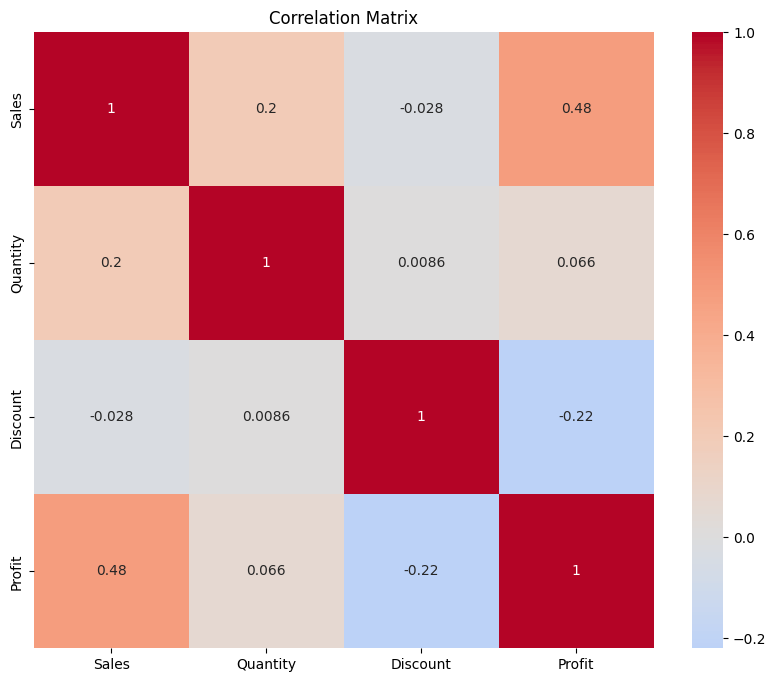

In [26]:
correlation = data[['Sales', 'Quantity', 'Discount', 'Profit']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# **📊 Disount Analysis**

## **🔹Number of times each discount is applied**

How many times has each discount rate been applied?

In [27]:

# كم مرة تم استخدام كل نسبة خصم
discount_counts = data['Discount'].value_counts().reset_index()
discount_counts.columns = ['Discount', 'Count']
print(discount_counts)

    Discount  Count
0       0.00   4798
1       0.20   3657
2       0.70    418
3       0.80    300
4       0.30    227
5       0.40    206
6       0.60    138
7       0.10     94
8       0.50     66
9       0.15     52
10      0.32     27
11      0.45     11


📌 Insight:
1.The majority of transactions were made without a discount (0.00)
4,798 times, which is the largest percentage (almost half of the data).

2.The most commonly used discount after 0.00 is 20%, used 3,657 times.
The 70% and 80% rates are relatively common (418 and 300 times).
They represent significant discounts, but are not used as frequently as 20%, but are higher than other medium discounts (30%, 40%, etc.).

3.Discounts between 10% and 50% are very rare.
For example, 10% (94), 15% (52), 30% (227), 40% (206), and 50% (66).

4.There are relatively unusual discounts, such as 0.32 and 0.45.

## **🔹The impact of discounts on sales**

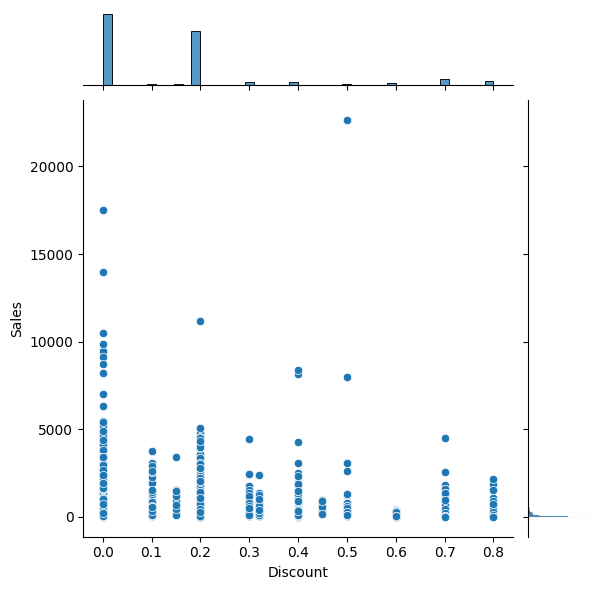

In [28]:
sns.jointplot(data= data, x= 'Discount',y='Sales')

📉  At large discounts (0.7, 0.8), there are no high sales.
All points are very low in sales at these discounts.
That is, high discounts do not lead to large sales and may be intended to dispose of low-value or in-demand products.

There are outliers for very high sales without discounts.
Some points reached over 20,000 in sales at a discount of 0.00.
This means that some products are selling in large quantities or at high values ​​without the need for discounts, which may indicate popular or necessary products.

## **🔹Average sales per discount percentage.**

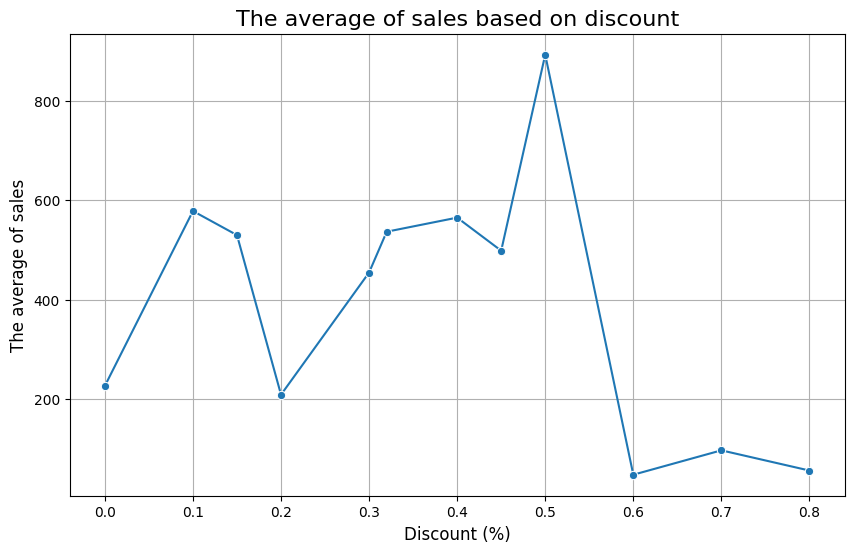

In [29]:
discount_sales_avg = data.groupby('Discount')['Sales'].mean().reset_index()


plt.figure(figsize=(10, 6))
sns.lineplot(data=discount_sales_avg, x='Discount', y='Sales', marker='o')
plt.title('The average of sales based on discount', fontsize=16)
plt.xlabel('Discount (%)', fontsize=12)
plt.ylabel('The average of sales', fontsize=12)
plt.grid(True)


plt.show()


📉  The highest average sales were at a 50% discount.

Although not very common, it recorded the highest average sales, indicating the effectiveness of this discount in certain specific situations.

A very sharp drop in sales after a 50% discount.

At discounts of 60% and above, average sales drop significantly, suggesting that very high discounts may be ineffective.

A 10% and 40% discount yielded relatively good results.

A significant increase in average sales was observed at these percentages, compared to other average discounts.

A 20% and 0% discount had the lowest average sales.


📉 Although the 20% discount is the most commonly used (based on the number of times it appears), the following applies:

Average sales per transaction with a 20% discount = Total sales at that discount ÷ Number of times it is used.
If most of these transactions are of low value, the average will be lower.

 What might explain this?
A 20% discount may be used on low-priced products,

such as stationery or small-value products, resulting in low sales per transaction despite the large number of transactions.

General, not targeted, promotions

A 20% discount may be given to everyone indiscriminately, resulting in an increase in the number of sales but not necessarily in their value.

Influence of category or region type

This discount may be used more in less demanding markets or categories with low profit margins.

## 🔹**The impact of discounts on profit**

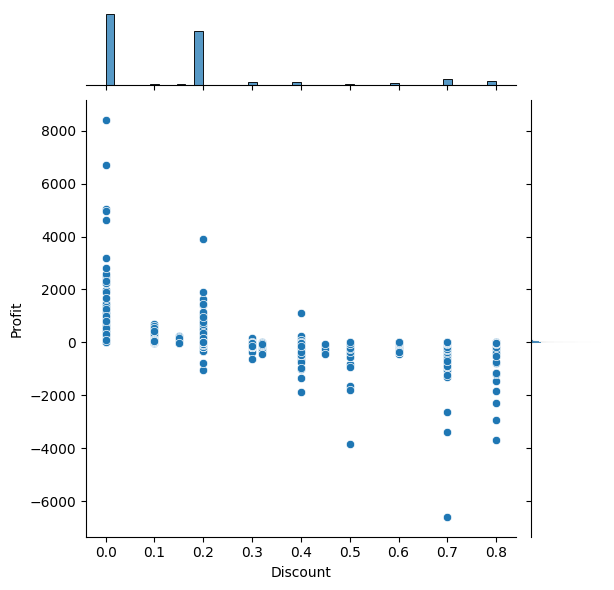

In [30]:
sns.jointplot(data= data, x= 'Discount',y='Profit')

📉 There is a clear inverse relationship between discounts and profit.
The higher the discount percentage, the sharper the profit decline.

High discounts (such as 0.4 to 0.8) often lead to direct losses (negative profit values).

 Highest profit is achieved without a discount (0%).
Most points at a 0% discount show healthy profits, reaching over 8,000.

This indicates that a large number of profitable sales were made without offering any discount.

 The 20% discount shows clear variation.
Although it is the most widely used, it shows both profitable and losing points.

This indicates that it is unstable in terms of profitability, and depends greatly on the type of product or target category.

 Discounts above 40% = Almost guaranteed losses.
From a discount of 0.5% and above, most points fall into the negative (loss) zone.

Offering these discounts may be financially unsustainable, even if sales increase.

✅ Recommendations for business owners:
Reevaluate your discount policy, especially those above 40%.

Based on data, these discounts don't lead to profits, but rather losses.

Focus on sales without discounts or with low discounts (0% - 10%).

This category generates good profits without the need to reduce profit margins.



****************************************************************

# 📊 **Sales Analysis**

#### **What is the total value of all sales ?**

In [31]:

total_sales = data["Sales"].sum()
print(f"The total sales in store: {total_sales:,.2f}")

The total sales in store: 2,297,200.86


📌 Insight: Indicates good business volume and wide spread of products.

## 🔹 **Sales Analysis by Category**

What is the total sales value in each category?

          Category        Sales
0        Furniture  741999.7953
1  Office Supplies  719047.0320
2       Technology  836154.0330


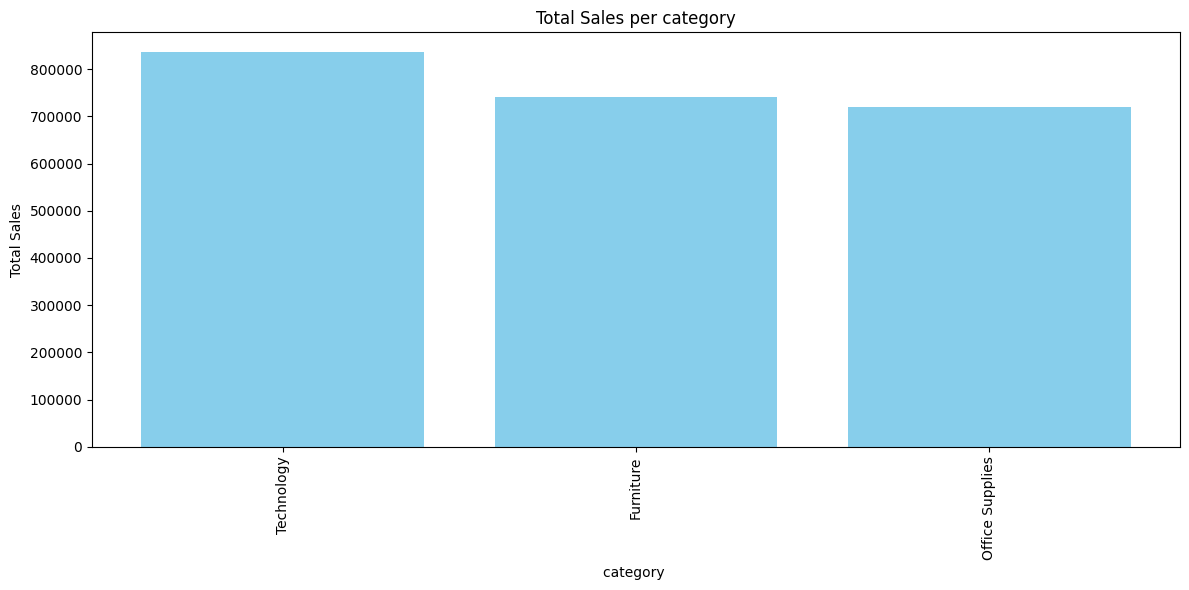

In [32]:
category_sales = data.groupby('Category')['Sales'].sum().reset_index()
print(category_sales)
# نرتب المنتجات تنازلياً حسب المبيعات
category_sales_sorted = category_sales.sort_values(by='Sales', ascending=False)
# --- 1. مخطط عمودي ---
plt.figure(figsize=(12, 6))
plt.bar(category_sales_sorted['Category'], category_sales_sorted['Sales'], color='skyblue')
plt.title('Total Sales per category')
plt.xlabel('category ')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

📉 Top-selling category: Technology
Recommendation: Invest in expanding this category and expanding the assortment offered.
Furniture: Ranking second in sales volume.
Office Supplies:Ranking last in sales.

## 🔹 Sales Analysis by Sub-Category

What is the total sales value in each sub-category?

   Sub-Category        Sales
0   Accessories  167380.3180
1    Appliances  107532.1610
2           Art   27118.7920
3       Binders  203412.7330
4     Bookcases  114879.9963
5        Chairs  328449.1030
6       Copiers  149528.0300
7     Envelopes   16476.4020
8     Fasteners    3024.2800
9   Furnishings   91705.1640
10       Labels   12486.3120
11     Machines  189238.6310
12        Paper   78479.2060
13       Phones  330007.0540
14      Storage  223843.6080
15     Supplies   46673.5380
16       Tables  206965.5320


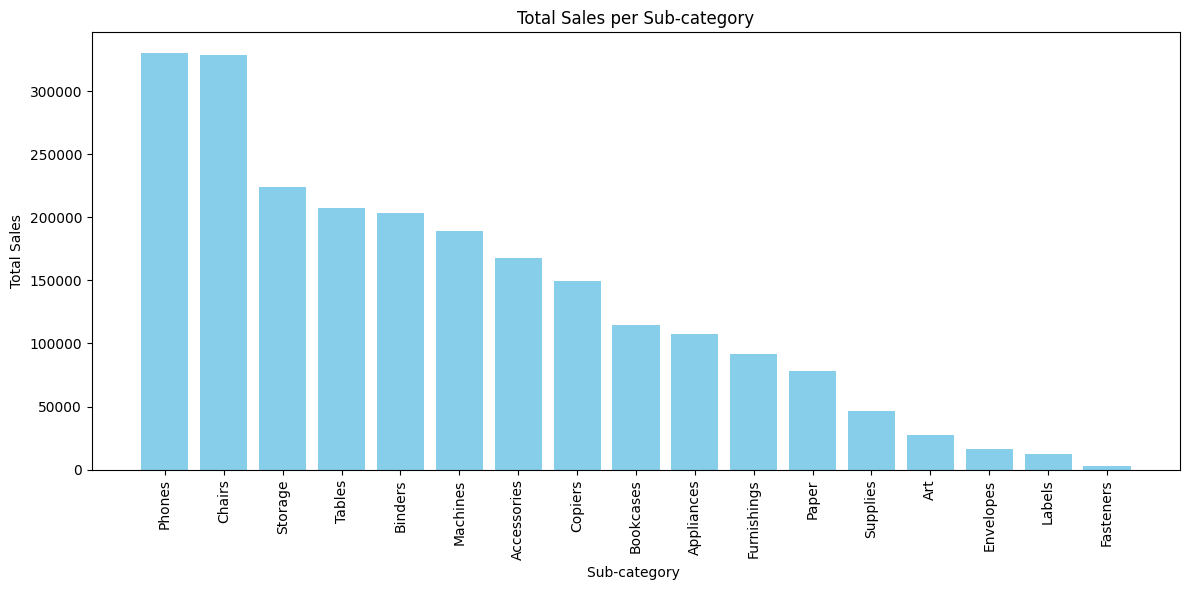

In [33]:
subcategory_sales = data.groupby('Sub-Category')['Sales'].sum().reset_index()
print(subcategory_sales)
# نرتب المنتجات تنازلياً حسب المبيعات
subcategory_sales_sorted = subcategory_sales.sort_values(by='Sales', ascending=False)
# --- 1. مخطط عمودي ---
plt.figure(figsize=(12, 6))
plt.bar(subcategory_sales_sorted['Sub-Category'],subcategory_sales_sorted['Sales'], color='skyblue')
plt.title('Total Sales per Sub-category')
plt.xlabel('Sub-category ')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

📉 Top selling subcategories:
Phones 330,007
Reflecting strong demand for mobile devices.

Chairs 328,449
Excellent performance among furniture, likely due to continued demand in both work and home environments.
Fasteners 3,024
Lowest selling, indicating weak demand or limited use.

Phones, chairs, and tables are sales engines: invest in developing them.

Some low-selling products can be combined or turned into promotions.

Data demonstrates the need to segment and target the market intelligently by category and use.

## **🔹 Sales analysis by Region**

What is the total sales value in each region?

    Region        Sales
0  Central  501239.8908
1     East  678781.2400
2    South  391721.9050
3     West  725457.8245


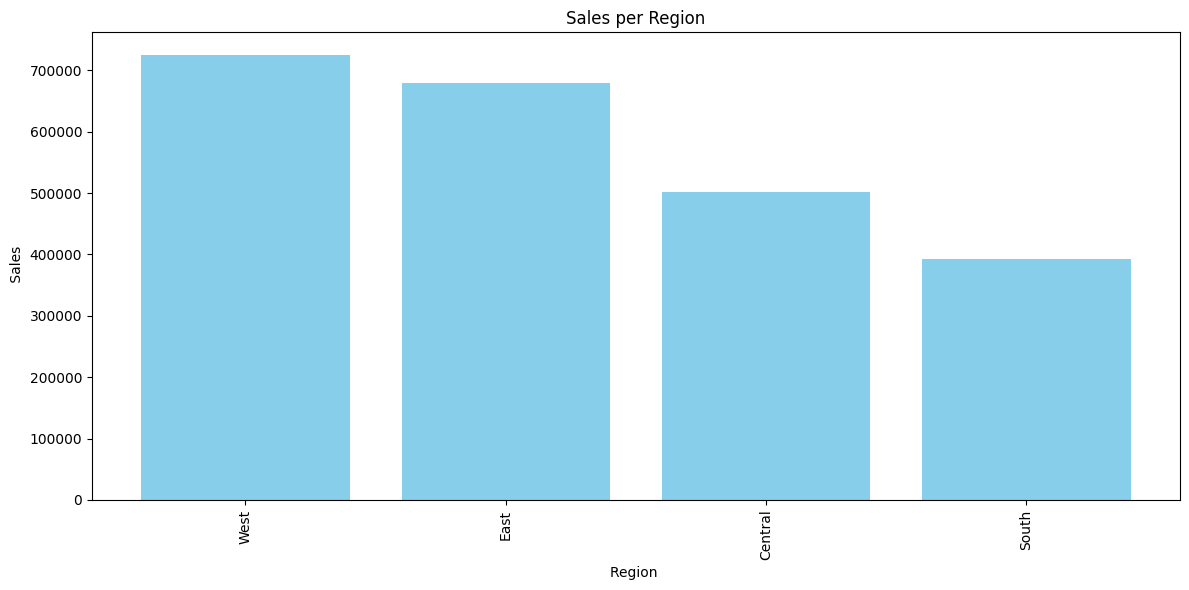

In [34]:
region_sales = data.groupby('Region')['Sales'].sum().reset_index()
print(region_sales)
# نرتب المنتجات تنازلياً حسب المبيعات
region_sales_sorted = region_sales.sort_values(by='Sales', ascending=False)
# --- 1. مخطط عمودي ---
plt.figure(figsize=(12, 6))
plt.bar(region_sales_sorted['Region'], region_sales_sorted['Sales'], color='skyblue')
plt.title('Sales per Region')
plt.xlabel('Region ')
plt.ylabel(' Sales')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## **🔹 Sales analysis by State**

What is the total sales value in each state?

                   State        Sales
0                Alabama   19510.6400
1                Arizona   35282.0010
2               Arkansas   11678.1300
3             California  457687.6315
4               Colorado   32108.1180
5            Connecticut   13384.3570
6               Delaware   27451.0690
7   District of Columbia    2865.0200
8                Florida   89473.7080
9                Georgia   49095.8400
10                 Idaho    4382.4860
11              Illinois   80166.1010
12               Indiana   53555.3600
13                  Iowa    4579.7600
14                Kansas    2914.3100
15              Kentucky   36591.7500
16             Louisiana    9217.0300
17                 Maine    1270.5300
18              Maryland   23705.5230
19         Massachusetts   28634.4340
20              Michigan   76269.6140
21             Minnesota   29863.1500
22           Mississippi   10771.3400
23              Missouri   22205.1500
24               Montana    5589.3520
25          

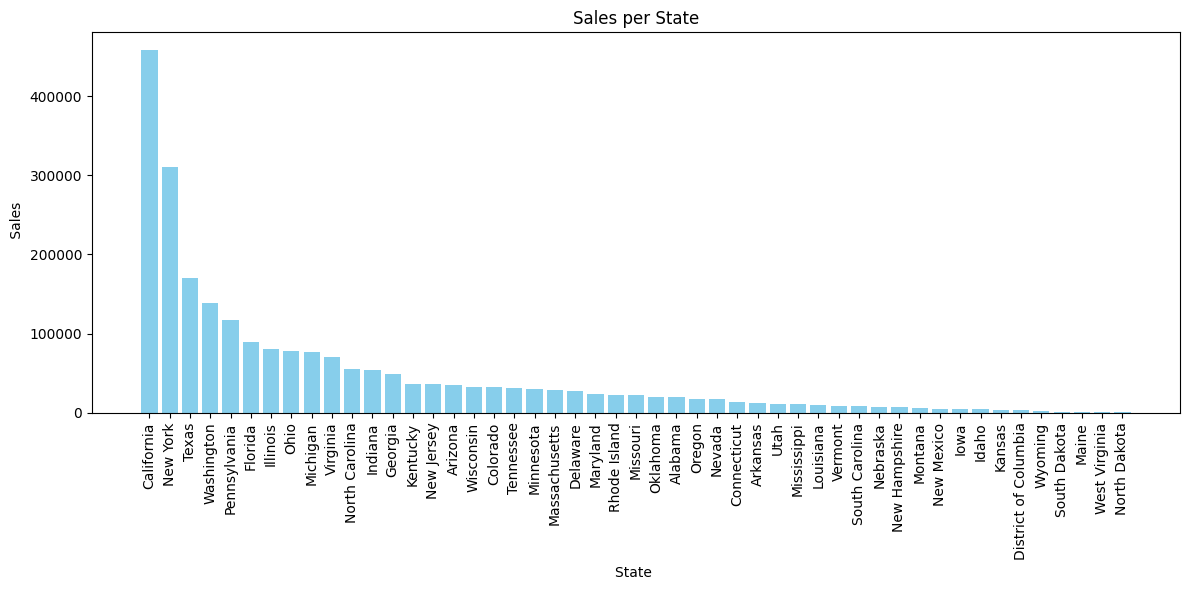

In [35]:
state_sales = data.groupby('State')['Sales'].sum().reset_index()
print(state_sales)
# نرتب المنتجات تنازلياً حسب المبيعات
state_sales_sorted = state_sales.sort_values(by='Sales', ascending=False)
# --- 1. مخطط عمودي ---
plt.figure(figsize=(12, 6))
plt.bar(state_sales_sorted['State'], state_sales_sorted['Sales'], color='skyblue')
plt.title('Sales per State')
plt.xlabel('State ')
plt.ylabel(' Sales')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



************************************************************

📉 Top-selling states:
California :457,688 ✅
Leads the list by a wide margin.
Next states:
New York : 310,876
Texas : 170,188
Washington : 138,641
Pennsylvania : 116,512
Recommendation: Maintain performance by increasing inventory and customer service.

Average-performing states: Need additional incentives
such as Illinois (80K), Ohio (78K), Michigan (76K), and Virginia (70K).
Their performance is good but can be improved.
Recommendation: Implement local marketing strategies or partner with local distributors.

Lowest-Selling States: Risk of Withdrawal or Missed Opportunities
North Dakota : 920
Maine : 1,271
West Virginia :1,210
South Dakota : 1,316

Very low sales levels may reflect:
Weak distribution, low demand, or market neglect.
Recommendation: Analyze the feasibility of remaining in these markets, or implement low-cost digital pilot campaigns.

 # **📊 Profit Analysis**

#### **What is the total value of all profit ?**

In [36]:
total_profit = data["Profit"].sum()
print(f"The total profit in store: {total_profit:,.2f}")

The total profit in store: 286,397.02


The total sales amount to 2,297,200.86, while the total profit is 286,397.

## **🔹 Profit Analysis By Categories**

          Category       Profit
0        Furniture   18451.2728
1  Office Supplies  122490.8008
2       Technology  145454.9481


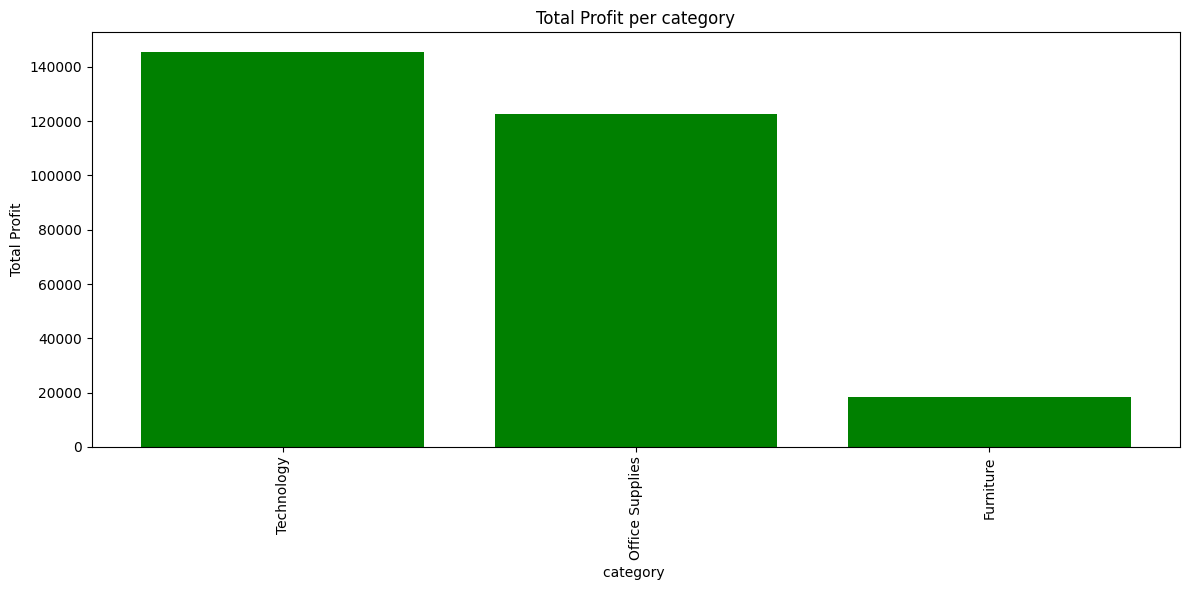

In [37]:
category_profit = data.groupby('Category')['Profit'].sum().reset_index()
print(category_profit)
# نرتب المنتجات تنازلياً حسب المبيعات
category_profit_sorted = category_profit.sort_values(by='Profit', ascending=False)
# --- 1. مخطط عمودي ---
plt.figure(figsize=(12, 6))
plt.bar(category_profit_sorted['Category'], category_profit_sorted['Profit'], color='green')
plt.title('Total Profit per category')
plt.xlabel('category ')
plt.ylabel('Total Profit')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

1. Technology:
The highest category in absolute profit.

2. Office Supplies:
It ranks second in profit, despite having the highest number of sales.

3. Furniture:
Despite achieving the second highest sales, it generates the lowest profit.

## **🔹Profit Analysis By Sub-Categories**

In [38]:
subcategory_profit = data.groupby('Sub-Category')['Profit'].sum().reset_index()

# نرتب المنتجات تنازلياً حسب المبيعات
subcategory_profit_sorted = subcategory_profit.sort_values(by='Profit', ascending=False)
print(subcategory_profit_sorted)

   Sub-Category      Profit
6       Copiers  55617.8249
13       Phones  44515.7306
0   Accessories  41936.6357
12        Paper  34053.5693
3       Binders  30221.7633
5        Chairs  26590.1663
14      Storage  21278.8264
1    Appliances  18138.0054
9   Furnishings  13059.1436
7     Envelopes   6964.1767
2           Art   6527.7870
10       Labels   5546.2540
11     Machines   3384.7569
8     Fasteners    949.5182
15     Supplies  -1189.0995
4     Bookcases  -3472.5560
16       Tables -17725.4811


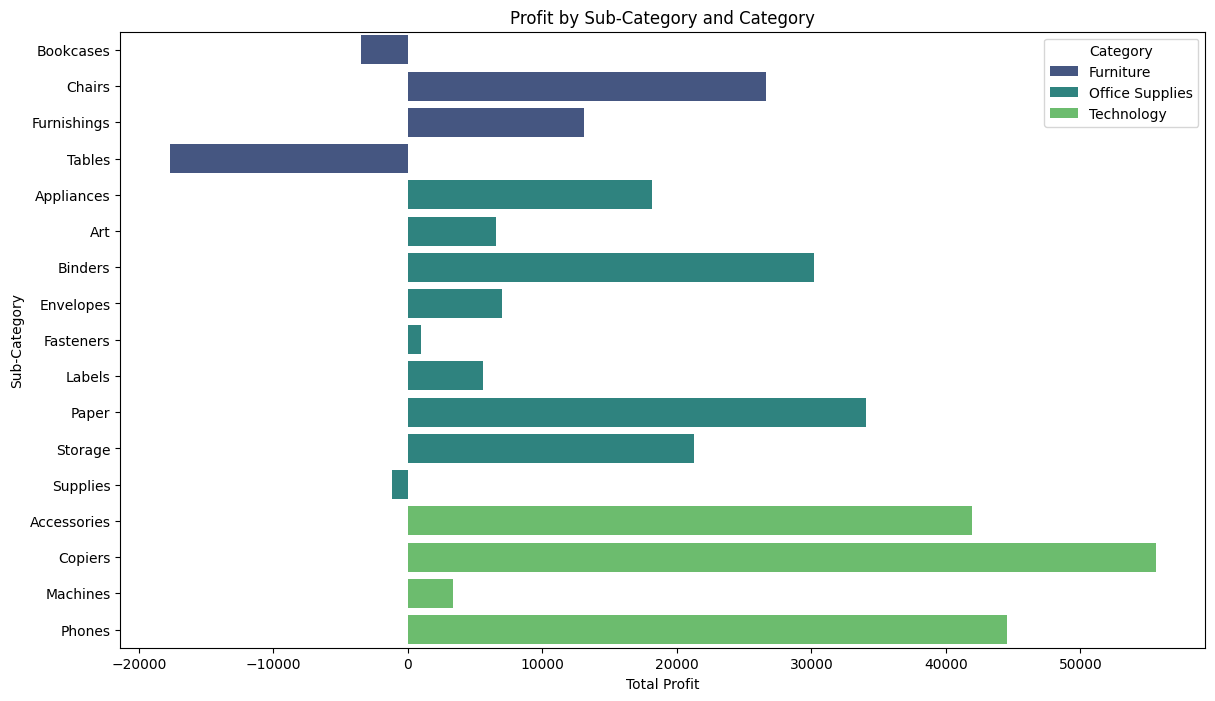

In [39]:
# تحليل الربح حسب الفئة الفرعية
subcat_profit = data.groupby(['Category', 'Sub-Category'])['Profit'].sum().reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(data=subcat_profit, x='Profit', y='Sub-Category', hue='Category', palette='viridis')
plt.title('Profit by Sub-Category and Category')
plt.xlabel('Total Profit')
plt.ylabel('Sub-Category')
plt.legend(title='Category')
plt.show()

Highest-profit categories:
Copiers (55,618), Phones (44,516), Accessories (41,937) are very strong financially.

Paper and binders are also generating excellent profits.

⚠️ Low or negative-profit categories:
Tables (-17,725), Bookcases (-3,473), and Supplies (-1,189) are a clear source of loss.

This requires an urgent review of prices or costs or the discontinuation of some products.

## **🔹Profit Analysis by Region**

What is the total profit value in each region?

## **🔹 Profit Analysis by State**

What is the total profit value in each state?

                   State      Profit
0                Alabama   5786.8253
1                Arizona  -3427.9246
2               Arkansas   4008.6871
3             California  76381.3871
4               Colorado  -6527.8579
5            Connecticut   3511.4918
6               Delaware   9977.3748
7   District of Columbia   1059.5893
8                Florida  -3399.3017
9                Georgia  16250.0433
10                 Idaho    826.7231
11              Illinois -12607.8870
12               Indiana  18382.9363
13                  Iowa   1183.8119
14                Kansas    836.4435
15              Kentucky  11199.6966
16             Louisiana   2196.1023
17                 Maine    454.4862
18              Maryland   7031.1788
19         Massachusetts   6785.5016
20              Michigan  24463.1876
21             Minnesota  10823.1874
22           Mississippi   3172.9762
23              Missouri   6436.2105
24               Montana   1833.3285
25              Nebraska   2037.0942
2

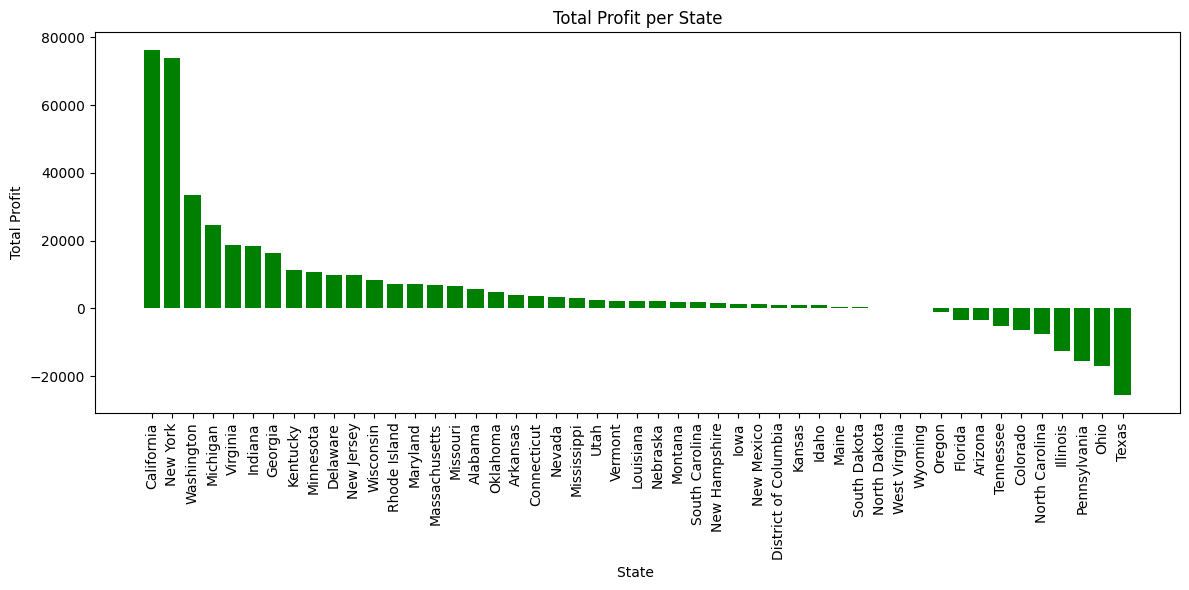

In [40]:
State_profit = data.groupby('State')['Profit'].sum().reset_index()
print(State_profit)

State_profit_sorted = State_profit.sort_values(by='Profit', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(State_profit_sorted['State'], State_profit_sorted['Profit'], color='green')
plt.title('Total Profit per State')
plt.xlabel('State ')
plt.ylabel('Total Profit')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Top-earning states:
California (76,381), New York (74,038), and Washington (33,403) are highly profitable markets.

Michigan, Virginia, and Georgia are also generating strong profits.

⚠️ Losing states (negative profits):
Texas (-25,729), Ohio (-16,971), Pennsylvania (-15,560), and Illinois (-12,608) are significant sources of loss.

Requires an immediate review of pricing, shipping, or offering strategies.

 # **🎯 Conclusions from the study of sales operations, sales and profit:**

## **🔹 By Category**

<ipython-input-45-052544c6f6c3>:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(df['Category'], rotation=45)
<ipython-input-45-052544c6f6c3>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(df['Category'], rotation=45)
<ipython-input-45-052544c6f6c3>:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[2].set_xticklabels(df['Category'], rotation=45)


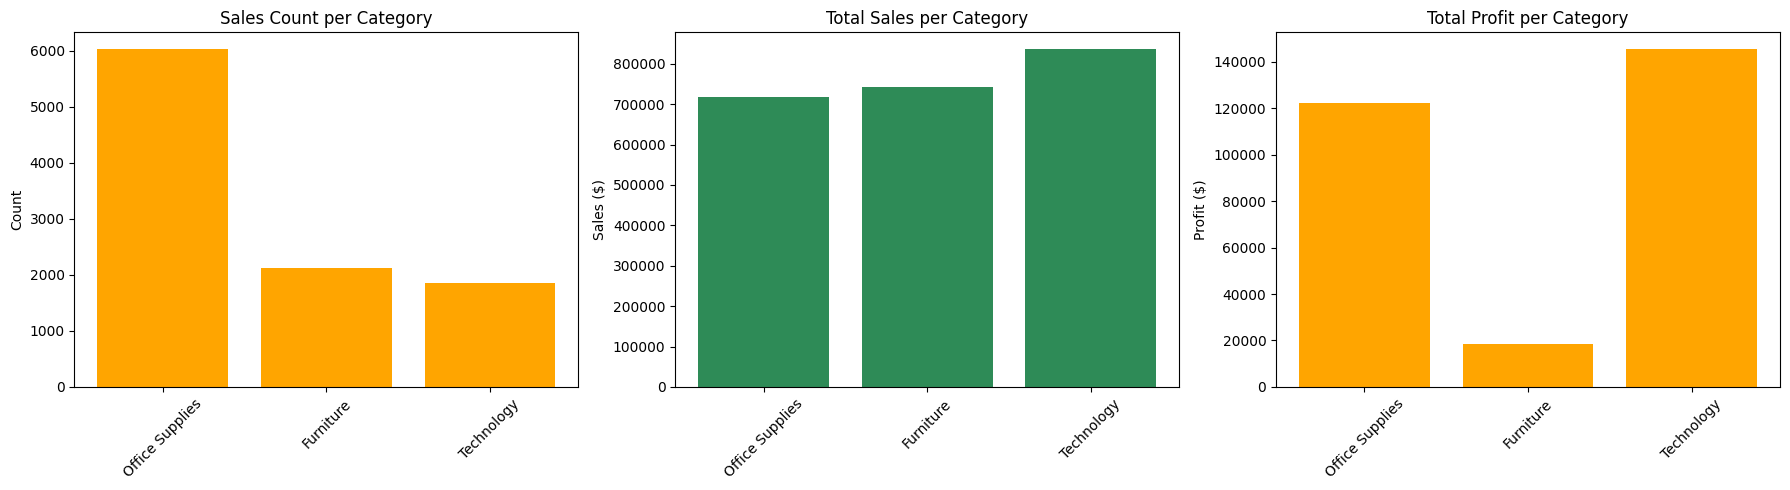

In [45]:
categories = ['Office Supplies', 'Furniture', 'Technology']
counts = [6026, 2121, 1847]
sales = [719047.0320, 741999.7953, 836154.0330]
profits = [122490.8008, 18451.2728, 145454.9481]

# إنشاء DataFrame
df = pd.DataFrame({
    'Category': categories,
    'Sales Count': counts,
    'Total Sales': sales,
    'Total Profit': profits
})

# إنشاء الرسم البياني
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# عدد المبيعات
axs[0].bar(df['Category'], df['Sales Count'], color='#FFA500')  # برتقالي
axs[0].set_title('Sales Count per Category')
axs[0].set_ylabel('Count')
axs[0].set_xticklabels(df['Category'], rotation=45)

# إجمالي المبيعات
axs[1].bar(df['Category'], df['Total Sales'], color='#2E8B57')  # أخضر داكن
axs[1].set_title('Total Sales per Category')
axs[1].set_ylabel('Sales ($)')
axs[1].set_xticklabels(df['Category'], rotation=45)

# إجمالي الأرباح
axs[2].bar(df['Category'], df['Total Profit'], color='#FFA500')  # برتقالي
axs[2].set_title('Total Profit per Category')
axs[2].set_ylabel('Profit ($)')
axs[2].set_xticklabels(df['Category'], rotation=45)

# تنسيق وتباعد
plt.tight_layout()
plt.show()


| Category           | Number of Transactions| Total Sales | Total Profit | Average Profit Per Transaction | Profit Margin (%) |
| --------------- | ------------ | --------------- | -------------- | --------------------- | -------------- |
| Office Supplies | 6,026        | 719,047.03      | 122,490.80     | **20.32 USD**         | **17%**        |
| Furniture       | 2,121        | 741,999.80      | 18,451.27      | **8.70 USD**          | **2.5% فقط**   |
| Technology      | 1,847        | 836,154.03      | 145,454.95     | **78.75 USD**         | **17.4%**      |

**************************************************

🎯 1. Technology:
Highest sales and highest profits with an excellent margin (17.4%).
Each sale generates $78.75 net profit.

📌 Recommendation: This category is the primary driver of profitability, and should be focused on expanding it and smartly promoting it (such as bundles, additional services, and after-sales support).

2. Office Supplies:
Highest number of transactions (6,026) and strong sales.
Despite the low average profit per transaction ($20.32), the overall margin is good (17%).

📌 Recommendation: Improve operational efficiency, and perhaps offer monthly subscriptions to small businesses to boost loyalty and profitability.

3. Furniture:
Despite achieving the second highest sales, the profit is almost nonexistent (2.5%)!
Each sale generates only $8.70 net profit!

📌 Recommendation: This category needs an urgent review of its costs or pricing. Discounts may be high or costs may be uncontrolled. Supply chain optimization or pricing adjustments are necessary.

## **🔹 By State**

🎯 California and New York lead in profit, sales, and order volume, indicating a large market.

Washington and Michigan generate high profits with relatively low demand, indicating efficient cost management.

States like Indiana and Virginia have good profits despite average order volume, indicating high customer or product quality.

Minnesota and Kentucky demonstrate that even states with low order volume can be highly profitable if the right market is chosen.

⚠️ States that need immediate action:

Texas has the third-highest sales (~170K) and order volume (985), but it has the largest source of loss (-25K), which may indicate inappropriate pricing or high costs.

Ohio and Pennsylvania are financial burner areas: high sales are offset by large losses, indicating: High operating costs. Excessive discounts or shipping. Poor product pricing or customer mix.

Illinois, Colorado, and North Carolina have good sales volume but are unprofitable, requiring a re-evaluation of their marketing or operational strategies.

Some states, such as Arizona and Florida, show promise in terms of sales, but profitability is low or negative, requiring efficiency improvements or price adjustments.

Oregon is close to breaking even and could become profitable with a simple improvement in cost management or a price increase.

# **📊 Product Analysis**

In [46]:
product_counts = data['Product Name'].value_counts().reset_index()
product_counts.columns = ['Product Name', 'Count']
print(product_counts.head(10))

                                 Product Name  Count
0                             Staple envelope     48
1                                     Staples     46
2                           Easy-staple paper     46
3                     Avery Non-Stick Binders     20
4                     Staples in misc. colors     19
5                  KI Adjustable-Height Table     18
6                              Staple remover     18
7                     Storex Dura Pro Binders     17
8                  Staple-based wall hangings     16
9  Situations Contoured Folding Chairs, 4/Set     15


### **🔹Product Analysis By Quantity**

What is the product that has the highest order quantity?

In [47]:
# Find the product with the highest total quantity ordered
most_ordered_product = data.groupby('Product Name')['Quantity'].sum().reset_index()
most_ordered_product = most_ordered_product.sort_values(by='Quantity', ascending=False).iloc[0]
print("Product with the highest quantity ordered:")
print(most_ordered_product)

Product with the highest quantity ordered:
Product Name    Staples
Quantity            215
Name: 1499, dtype: object


 ## **🔹 Best-Selling Product**

In [48]:
# Find the product with the highest Sales value
sales_by_value = data.groupby('Product Name')['Sales'].sum().reset_index()
sales_by_value = sales_by_value.sort_values(by='Sales', ascending=False)
print("Product with the highest Sales value:")
print(sales_by_value.iloc[0])

Product with the highest Sales value:
Product Name    Canon imageCLASS 2200 Advanced Copier
Sales                                       61599.824
Name: 404, dtype: object


## **🔹The product with the highest profit**

In [49]:
# Find the product with the highest total Profit value
Profit_by_value = data.groupby('Product Name')['Profit'].sum().reset_index()
Profit_by_value = Profit_by_value.sort_values(by='Profit', ascending=False)
print("Product with the highest Profit value:")
print(Profit_by_value.iloc[0])


Product with the highest Profit value:
Product Name    Canon imageCLASS 2200 Advanced Copier
Profit                                      25199.928
Name: 404, dtype: object


# **📊 Customer Analysis**

## **🔹Customer Analysis by Profit**

### **🔹Who are the top ten most profitable clients?**

          Customer Name     Profit
0          Tamara Chand  8981.3239
1          Raymond Buch  6976.0959
2          Sanjit Chand  5757.4119
3          Hunter Lopez  5622.4292
4         Adrian Barton  5444.8055
5          Tom Ashbrook  4703.7883
6  Christopher Martinez  3899.8904
7         Keith Dawkins  3038.6254
8           Andy Reiter  2884.6208
9         Daniel Raglin  2869.0760


<ipython-input-50-ee76fd8665b1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_customers, x='Profit', y='Customer Name', palette='viridis')


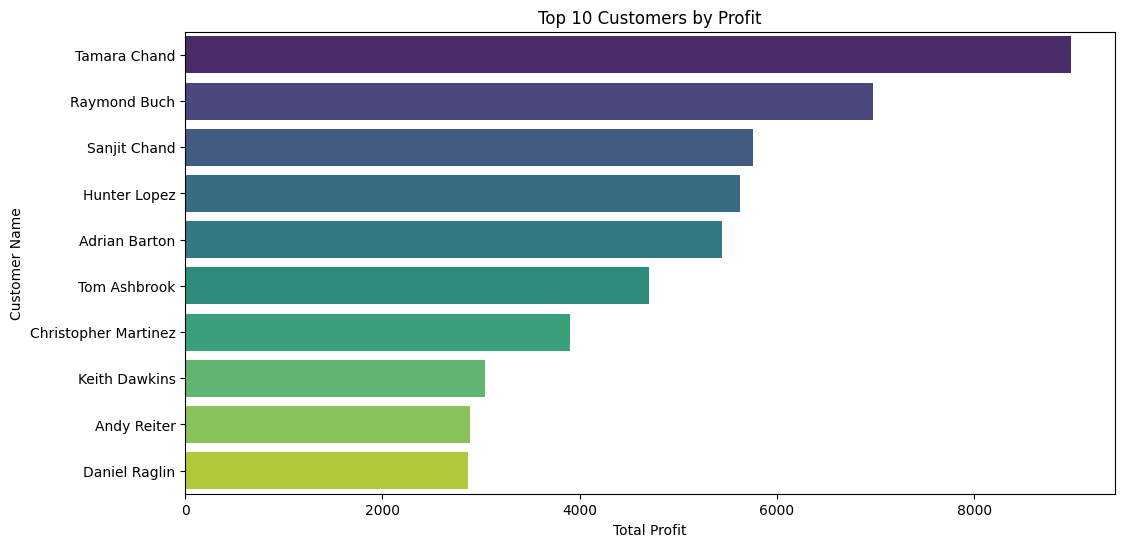

In [50]:
# أفضل 10 عملاء من حيث الربح
top_customers = data.groupby('Customer Name')['Profit'].sum().nlargest(10).reset_index()
print(top_customers)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_customers, x='Profit', y='Customer Name', palette='viridis')
plt.title('Top 10 Customers by Profit')
plt.xlabel('Total Profit')
plt.ylabel('Customer Name')
plt.show()

## 🔹 **Customer Analysis by Quantity**

         Customer Name  Quantity
0     Jonathan Doherty       150
1        William Brown       146
2             John Lee       143
3           Paul Prost       138
4    Steven Cartwright       133
5           Emily Phan       124
6    Cassandra Brandow       122
7  Chloris Kastensmidt       122
8         Edward Hooks       120
9         Matt Abelman       117


<ipython-input-51-88c9e1492804>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_customers, x='Quantity', y='Customer Name', palette='viridis')


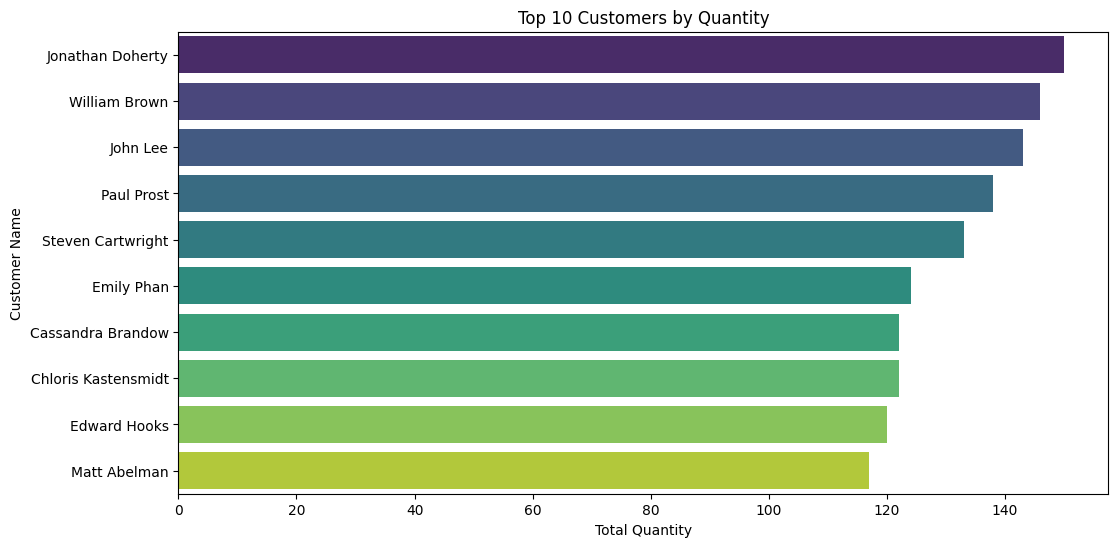

In [51]:
top_customers = data.groupby('Customer Name')['Quantity'].sum().nlargest(10).reset_index()
print(top_customers)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_customers, x='Quantity', y='Customer Name', palette='viridis')
plt.title('Top 10 Customers by Quantity')
plt.xlabel('Total Quantity')
plt.ylabel('Customer Name')
plt.show()

**************************************************

# **📊 Time Series Analysis**

In [52]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['year'] = data['Order Date'].dt.year
data['month'] = data['Order Date'].dt.month
data['day_of_week'] = data['Order Date'].dt.day_name()
data['year_month'] = data['Order Date'].dt.to_period('M')

## **🔹 Monthly Sales**

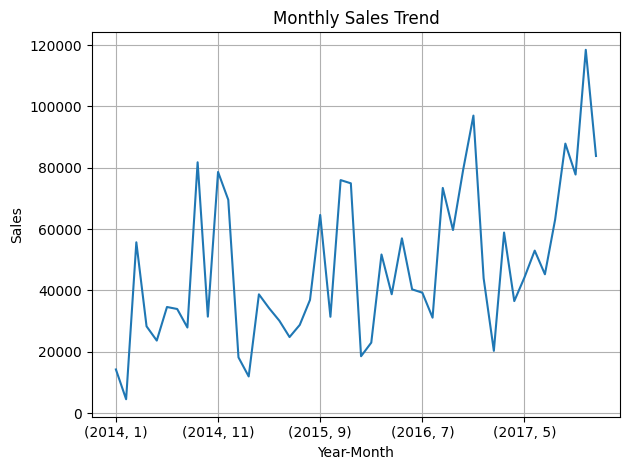

In [54]:
monthly_sales = data.groupby(['year', 'month'])['Sales'].sum()
monthly_sales.plot(kind='line', title='Monthly Sales Trend')
monthly_sales = monthly_sales.round(0).astype(int)
plt.xlabel("Year-Month")
plt.ylabel("Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

🎯 Insights from the monthly sales trend:
A clear seasonal pattern:

There are clear sales peaks that occur almost every year, specifically at the end of each year (November–December).

This indicates that sales increase around the holiday season, which means that promotional campaigns can be enhanced during this period.

Severe cyclical declines:

At the beginning of each year (January–February), sales decline significantly, which is common after the end-of-year buying season.

Preparation for these periods should be made by reducing costs or focusing on incentive offers.

General upward trend:

Despite fluctuations, there is a general upward trend in sales from 2014–2017, indicating growth in business activity over time.

Largest sales peak:

occurred in mid-/end of 2017, necessitating a detailed study of this period (offers, products, campaigns) to replicate its success.

Slump periods requiring intervention:

Such as mid-2016, there is a sharp and persistent decline in sales.

The strategy in place during those periods (pricing, distribution, campaigns) should be reviewed.

## **🔹 Monthly Profit**

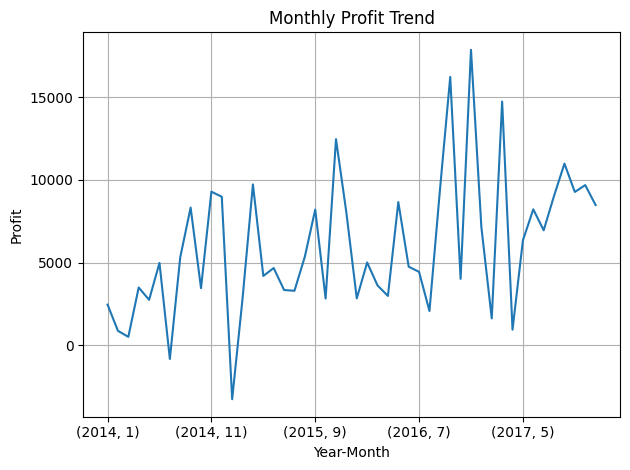

In [56]:
monthly_profit = data.groupby(['year', 'month'])['Profit'].sum()
monthly_profit.plot(kind='line', title='Monthly Profit Trend')
monthly_profit = monthly_profit.round(0).astype(int)
plt.xlabel("Year-Month")
plt.ylabel("Profit")
plt.grid(True)
plt.tight_layout()
plt.show()

__________________________________________